In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('data/train.csv')


df_train.drop('id',axis = 1, inplace = True)
print(len(df_train.columns))
df_train.columns

14


Index(['penalty', 'l1_ratio', 'alpha', 'max_iter', 'random_state', 'n_jobs',
       'n_samples', 'n_features', 'n_classes', 'n_clusters_per_class',
       'n_informative', 'flip_y', 'scale', 'time'],
      dtype='object')

In [3]:
df_train['time'].describe()

count    400.000000
mean       3.202330
std        5.265786
min        0.075342
25%        0.504478
50%        1.405072
75%        3.628776
max       41.099969
Name: time, dtype: float64

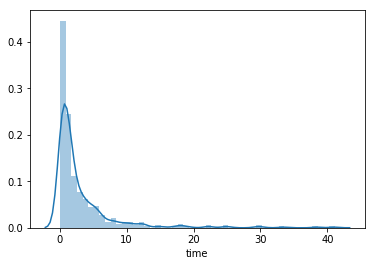

In [4]:
sns.distplot(df_train['time'])

In [5]:
print("Skewness: %f" % df_train['time'].skew())
print("Kurtosis: %f" % df_train['time'].kurt())

Skewness: 3.859180
Kurtosis: 18.566629


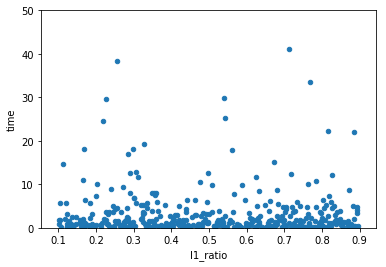

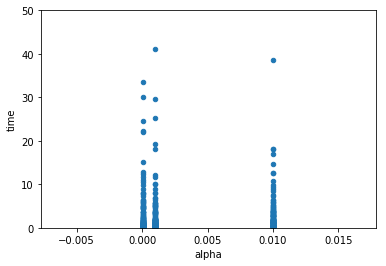

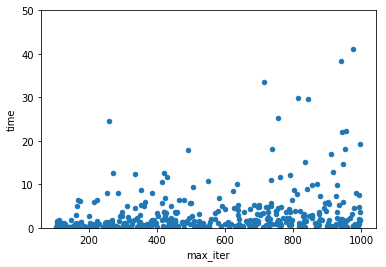

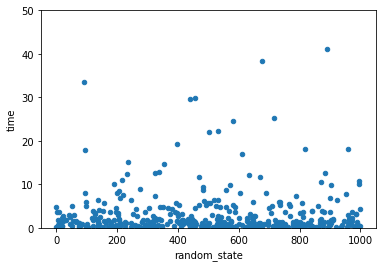

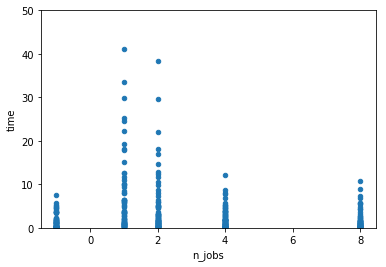

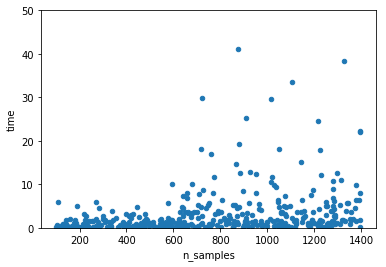

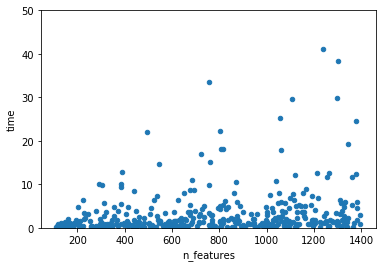

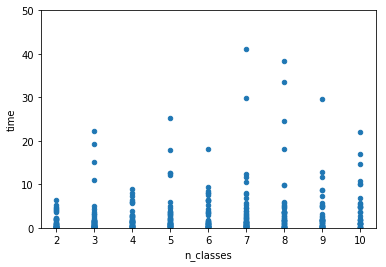

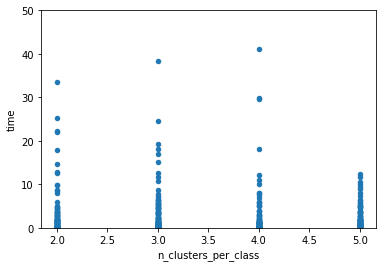

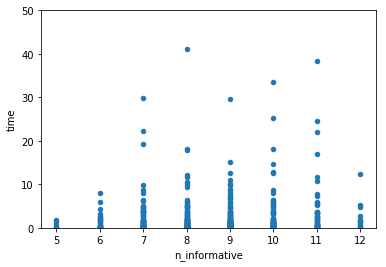

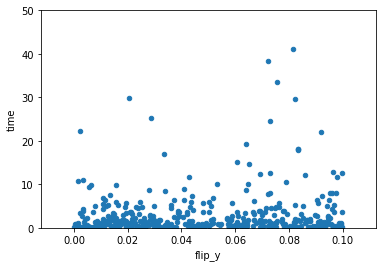

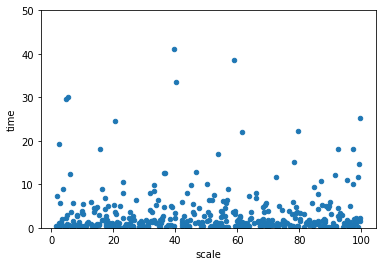

In [6]:
columnsList_num = ['l1_ratio', 'alpha', 'max_iter', 'random_state',
       'n_jobs', 'n_samples', 'n_features', 'n_classes',
       'n_clusters_per_class', 'n_informative', 'flip_y', 'scale']
for i in columnsList_num:

    var = i
    data = pd.concat([df_train['time'], df_train[var]], axis=1)
    data.plot.scatter(x=var, y='time', ylim=(0,50));
#     var = 'alpha'
#     data = pd.concat([df_train['time'], df_train[var]], axis=1)
#     data.plot.scatter(x=var, y='time', ylim=(0,50));

(-0.5, 3.5, 0, 50)

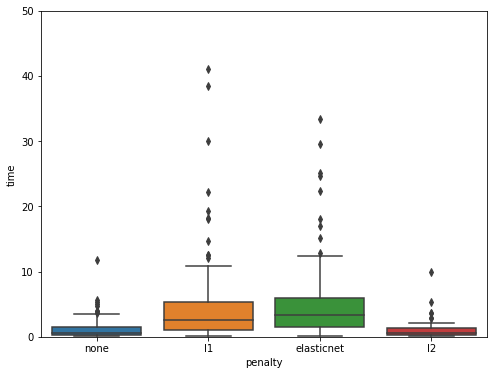

In [7]:
#for categorical features
var = 'penalty'
data = pd.concat([df_train['time'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="time", data=data)
fig.axis(ymin=0, ymax=50)

(-0.5, 8.5, 0, 50)

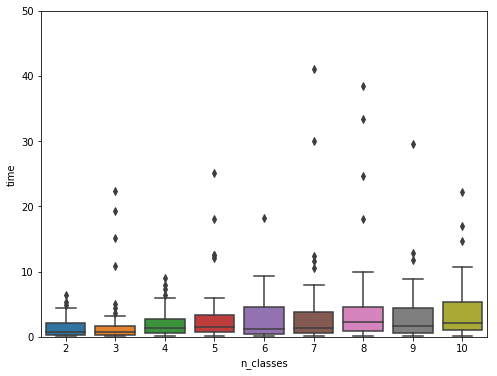

In [8]:
#for categorical features
var = 'n_classes'
data = pd.concat([df_train['time'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="time", data=data)
fig.axis(ymin=0, ymax=50)

(-0.5, 4.5, 0, 50)

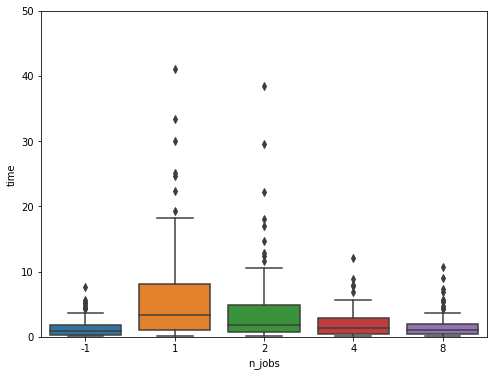

In [9]:
#for categorical features
var = 'n_jobs'
data = pd.concat([df_train['time'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="time", data=data)
fig.axis(ymin=0, ymax=50)

(-0.5, 3.5, 0, 10)

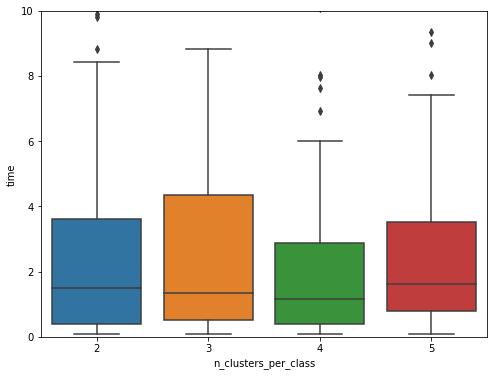

In [10]:
#for categorical features
var = 'n_clusters_per_class'
data = pd.concat([df_train['time'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="time", data=data)
fig.axis(ymin=0, ymax=10)

(-0.5, 7.5, 0, 10)

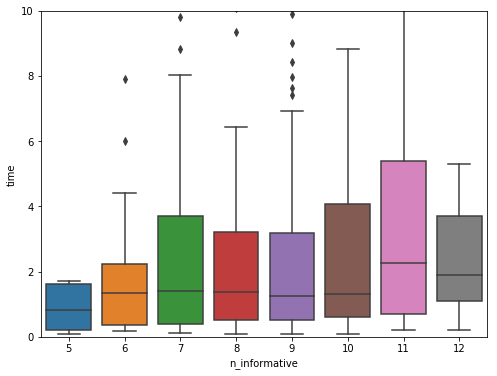

In [11]:
#for categorical features
var = 'n_informative'
data = pd.concat([df_train['time'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="time", data=data)
fig.axis(ymin=0, ymax=10)

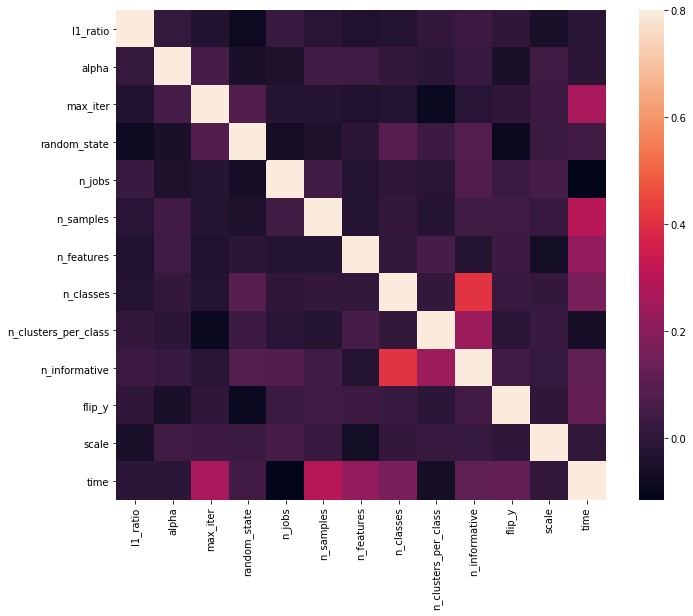

In [12]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

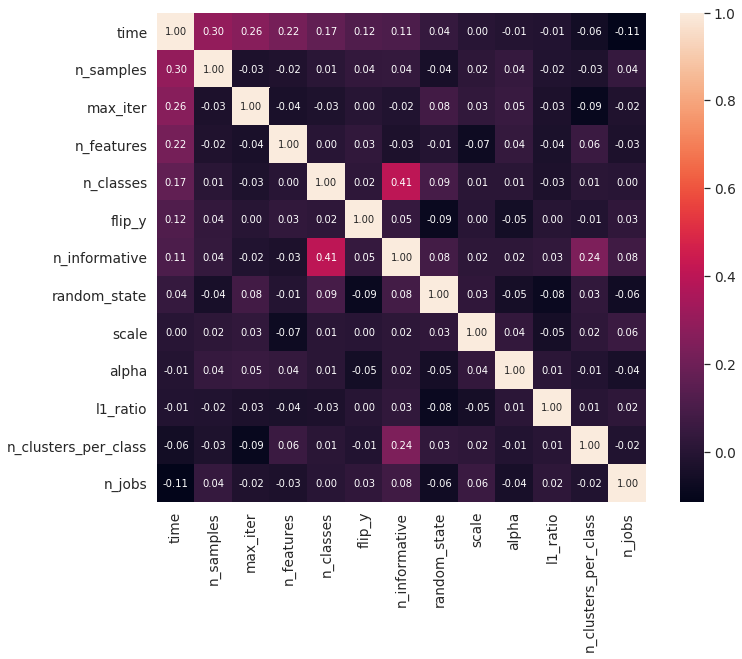

In [13]:
k = 14 #number of variables for heatmap
cols = corrmat.nlargest(k, 'time')['time'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

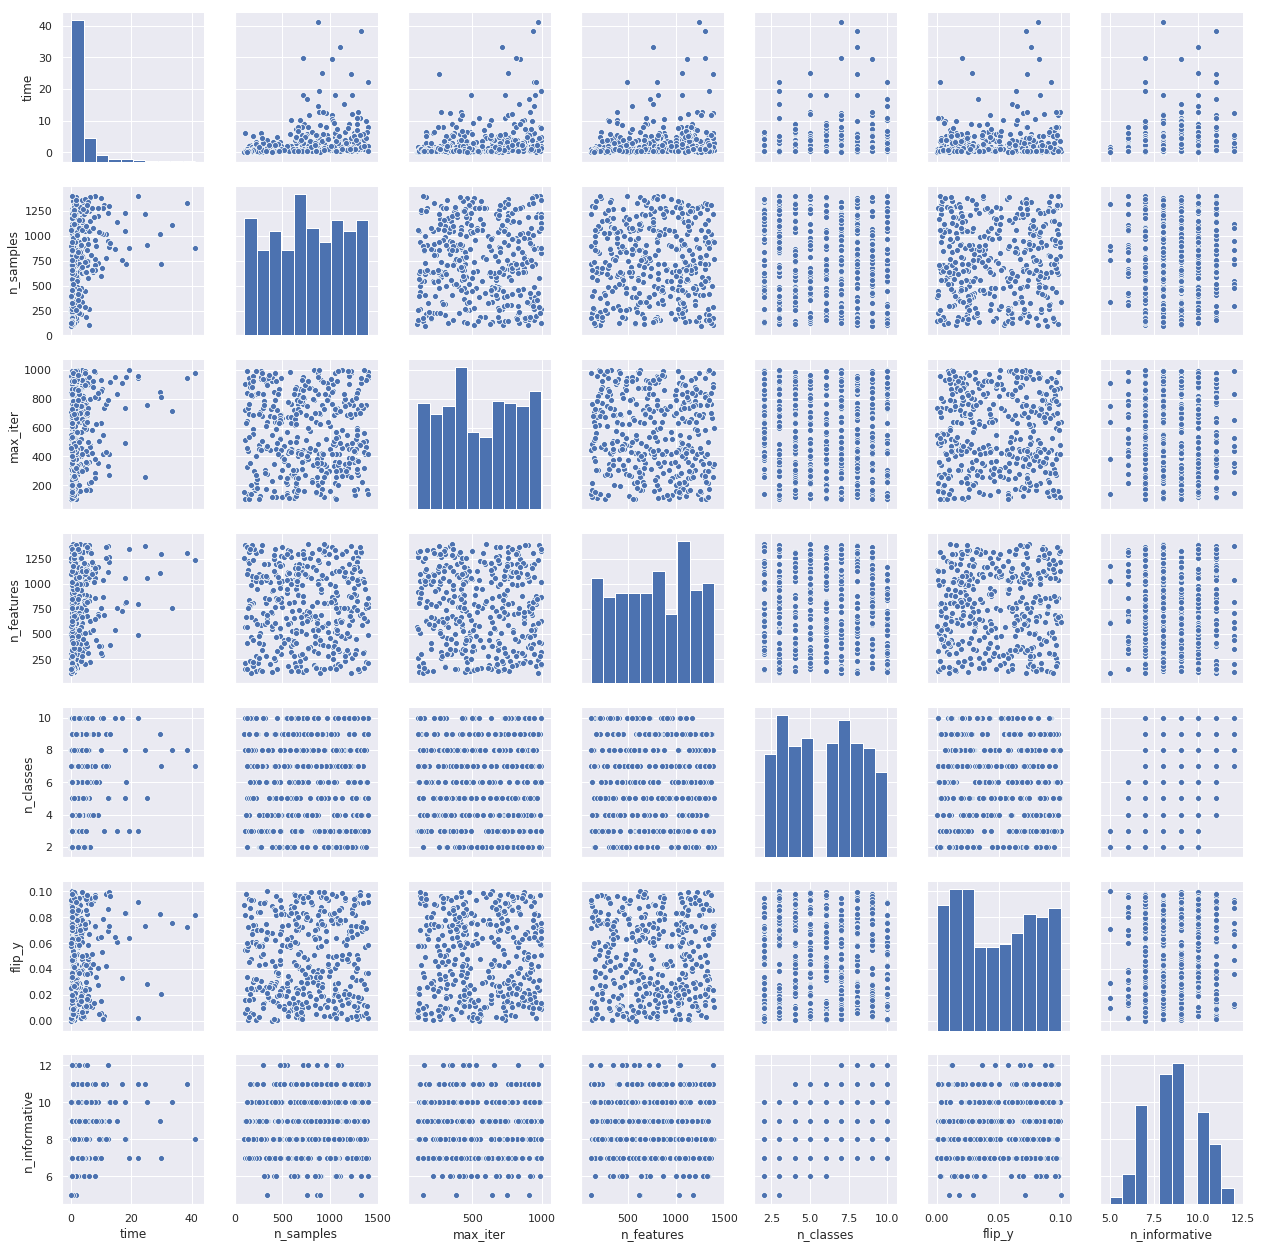

In [14]:
sns.set()
cols = ['time', 'n_samples', 'max_iter', 'n_features', 'n_classes', 'flip_y', 'n_informative']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

In [15]:
df_train.isnull().sum().max()

0

In [16]:
selected_features = ['penalty','time', 'n_samples', 'max_iter',
                         'n_features', 'n_classes', 'flip_y', 'n_informative',
                         'n_jobs','n_clusters_per_class']

df_train = df_train[selected_features]
saleprice_scaled = StandardScaler().fit_transform(df_train['time'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.59457505]
 [-0.59145995]
 [-0.58955666]
 [-0.58942102]
 [-0.58931367]
 [-0.5892638 ]
 [-0.58923611]
 [-0.58909666]
 [-0.58896877]
 [-0.58856802]]

outer range (high) of the distribution:
[[3.06002712]
 [3.60003651]
 [3.63538033]
 [4.08025184]
 [4.18008179]
 [5.00969517]
 [5.08847898]
 [5.75146789]
 [6.70643432]
 [7.20597103]]


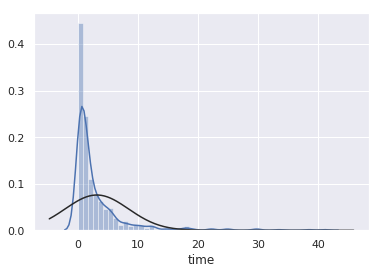

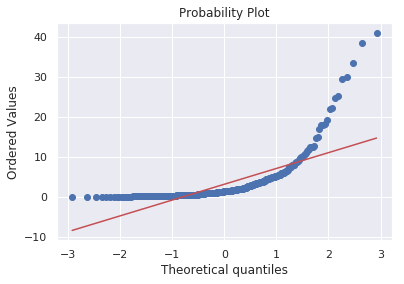

In [17]:
sns.distplot(df_train['time'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['time'], plot=plt)

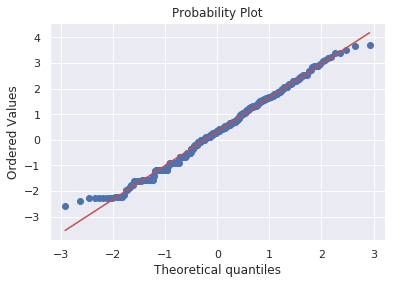

In [18]:
df_train['time'] = np.log(df_train['time'])
# df_train['time']
# sns.distplot(df_train['time'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['time'], plot=plt)

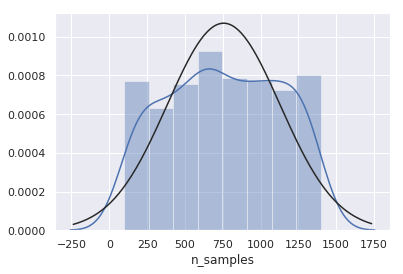

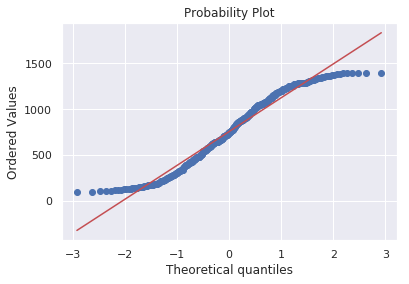

In [19]:
sns.distplot(df_train['n_samples'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['n_samples'], plot=plt)

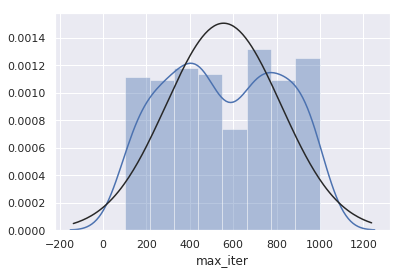

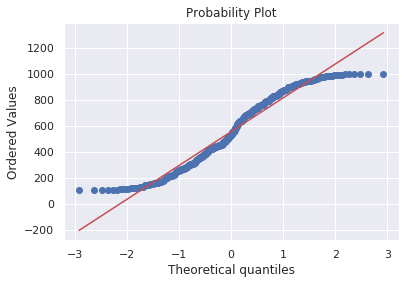

In [20]:
sns.distplot(df_train['max_iter'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['max_iter'], plot=plt)

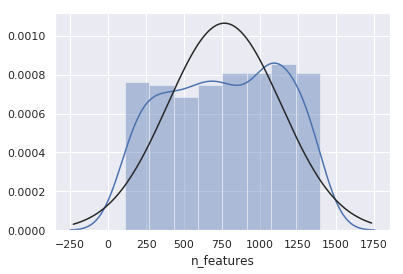

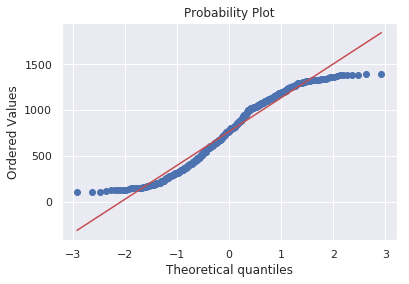

In [21]:
sns.distplot(df_train['n_features'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['n_features'], plot=plt)

In [22]:
df_train

,penalty,time,n_samples,max_iter,n_features,n_classes,flip_y,n_informative,n_jobs,n_clusters_per_class
0,none,-0.891629,1089,417,327,4,0.074798,7,-1,3
1,l1,1.373957,790,578,373,4,0.077781,7,1,5
2,none,-0.997767,428,588,1198,2,0.030196,6,2,5
3,none,0.004549,877,829,313,6,0.057261,7,4,5
4,elasticnet,-0.219649,216,167,644,8,0.073728,11,2,5
5,l1,2.068900,1396,986,861,4,0.097483,6,4,2
6,none,0.791209,908,929,691,5,0.095324,6,2,2
7,l1,0.878440,677,422,737,9,0.040463,8,8,5
8,l1,0.002338,498,308,1191,2,0.025639,9,8,4
9,l2,0.474459,1380,510,803,9,0.024620,10,8,5
